In [ ]:
%matplotlib
# Import our dependencies
import pandas as pd
import matplotlib as plt
from sklearn.datasets import make_blobs
import sklearn as skl
import tensorflow as tf

Using matplotlib backend: agg


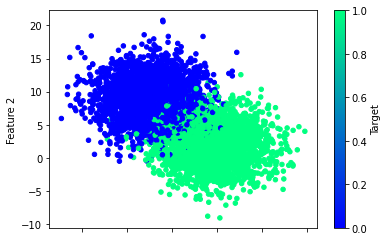

In [ ]:
# Generate dummy dataset
X, y = make_blobs(n_samples=5000, centers=2, n_features=2, random_state=42, cluster_std=3)

# Creating a DataFrame with the dummy data
df = pd.DataFrame(X, columns=["Feature 1", "Feature 2"])
df["Target"] = y

# Plotting the dummy data
df.plot.scatter(x="Feature 1", y="Feature 2", c="Target", colormap="winter")

In [ ]:
# Use sklearn to split dataset
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [ ]:
# Create scaler instance
X_scaler = skl.preprocessing.StandardScaler()

# Fit the scaler
X_scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)


In [ ]:
# Create the Keras Sequential model
byonn_model = tf.keras.models.Sequential()

In [ ]:
# Add our first Dense layer, including the input layer
byonn_model.add(tf.keras.layers.Dense(units=5, activation="relu", input_dim=2))

In [ ]:
# Add the output layer that uses a probability activation function
byonn_model.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

In [ ]:
# Check the structure of the Sequential model
byonn_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 5)                 15        
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 6         
Total params: 21
Trainable params: 21
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# Compile the Sequential model together and customize metrics
byonn_model.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

In [ ]:
# Fit the model to the training data
fit_model = byonn_model.fit(X_train_scaled, y_train, epochs=100)

Epoch 1/100
118/118 [==============================] - 1s 1ms/step - loss: 0.4991 - accuracy: 0.8653
Epoch 2/100
118/118 [==============================] - 0s 1ms/step - loss: 0.3875 - accuracy: 0.9080
Epoch 3/100
118/118 [==============================] - 0s 1ms/step - loss: 0.3019 - accuracy: 0.9304
Epoch 4/100
118/118 [==============================] - 0s 1ms/step - loss: 0.2415 - accuracy: 0.9387
Epoch 5/100
118/118 [==============================] - 0s 1ms/step - loss: 0.2016 - accuracy: 0.9432
Epoch 6/100
118/118 [==============================] - 0s 1ms/step - loss: 0.1762 - accuracy: 0.9459
Epoch 7/100
118/118 [==============================] - 0s 1ms/step - loss: 0.1602 - accuracy: 0.9459
Epoch 8/100
118/118 [==============================] - 0s 1ms/step - loss: 0.1501 - accuracy: 0.9467
Epoch 9/100
118/118 [==============================] - 0s 1ms/step - loss: 0.1434 - accuracy: 0.9469
Epoch 10/100
118/118 [==============================] - 0s 1ms/step - loss: 0.1389 - accura

In [ ]:
# Evaluate the model using the test data
model_loss, model_accuracy = byonn_model.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

40/40 - 0s - loss: 0.1138 - accuracy: 0.9568
Loss: 0.11383567750453949, Accuracy: 0.9567999839782715


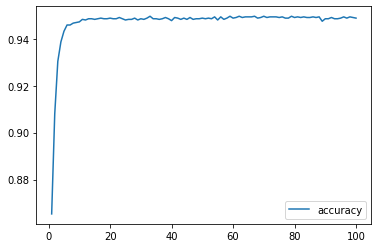

In [ ]:
# Create a DataFrame containing training history
training_history_df = pd.DataFrame(fit_model.history)

training_history_df.index += 1

# Plot the accuracy
training_history_df.plot(y="accuracy")
